In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.1.1'

In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

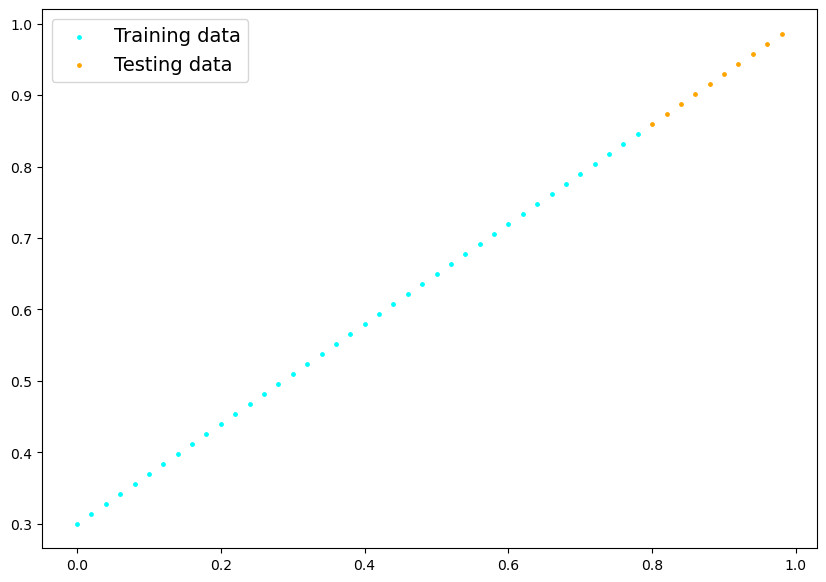

In [4]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="cyan", s=6, label="Training data")
    plt.scatter(test_data, test_labels, c="orange", s=6, label="Testing data")
    if (predictions is not None):
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    plt.legend(prop={"size": 14});

plot_predictions()
    

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 使用随机tensor初始化权重与偏置
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # 定义前向传播方法，x是输入数据
    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias




In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

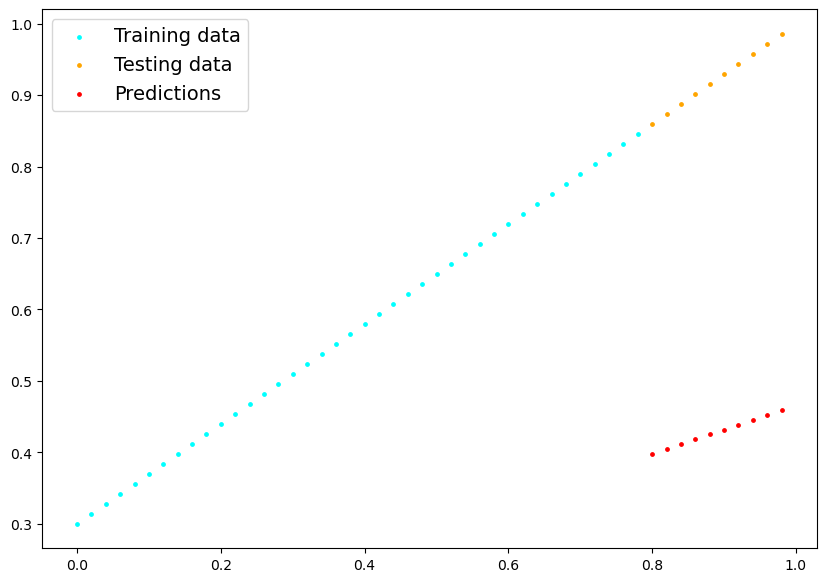

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# Set up a loss function
loss_fn = nn.L1Loss()


optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.001)




In [12]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [29]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model_0.train() # train mode in pytorch set
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss: {loss} Test Loss {test_loss}")
        print(model_0.state_dict())
        



Loss: 0.0004444979131221771
Epoch: 0 Loss: 0.0004444979131221771 Test Loss 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Epoch: 10 Loss: 0.0004444979131221771 Test Loss 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Loss: 0.0007075957837514579
Loss: 0.0004444979131221771
Epoch: 20 Loss: 0.0004444979131221771 Test Loss 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tens

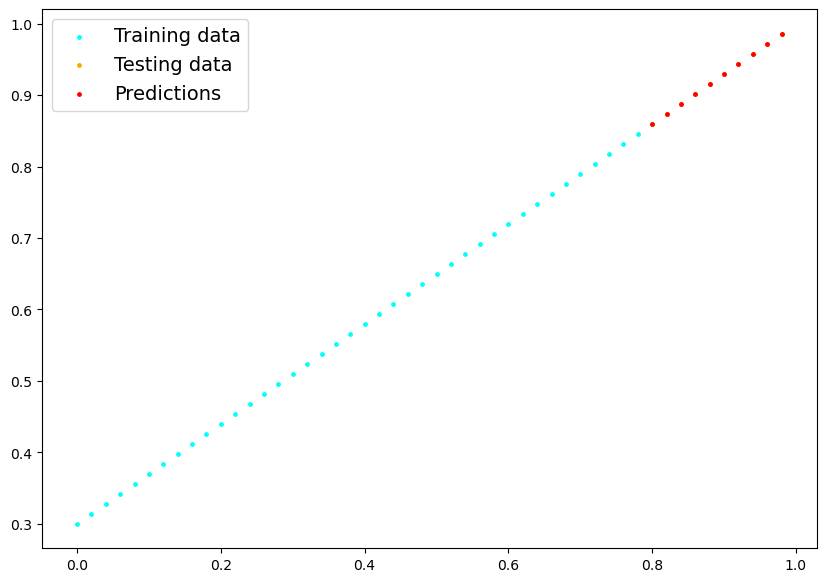

In [30]:
plot_predictions(predictions=test_pred)

In [31]:
## saving a model in pytorch
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [32]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [33]:
!ls -l models

total 8
-rw-r--r--  1 zowcool  staff  1680 Dec  3 12:59 01_pytorch_workflow_model_0.pth


In [34]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])